In [24]:
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC
import pandas as pd
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
import keras

## Decision Tree with Iris Data

Text(0.5, 1.0, 'feature scatter')

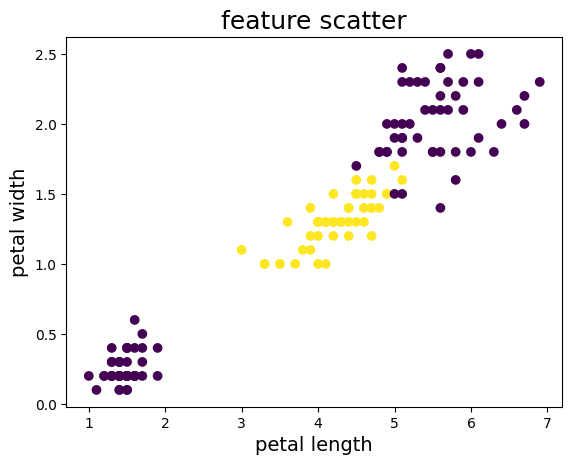

In [ ]:
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)]
y = (iris['target'] == 1).astype(np.float64)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("petal length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.title("feature scatter", fontsize = 18)

In [ ]:
# 데이터 확인해보기
# 이미 스케일링 되어있는거 같아
# 굳이 스케일링 안 할 수도 있지만 할 수도 있어
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target, columns=['target'])

dfX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
dfy.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

In [ ]:
# value를 뽑아와서 데이터로 사용하자
X_train = X_train.values
X_test = X_test.values

# 1차원 리스트로 반환
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

In [ ]:
X_train[:2]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4]])

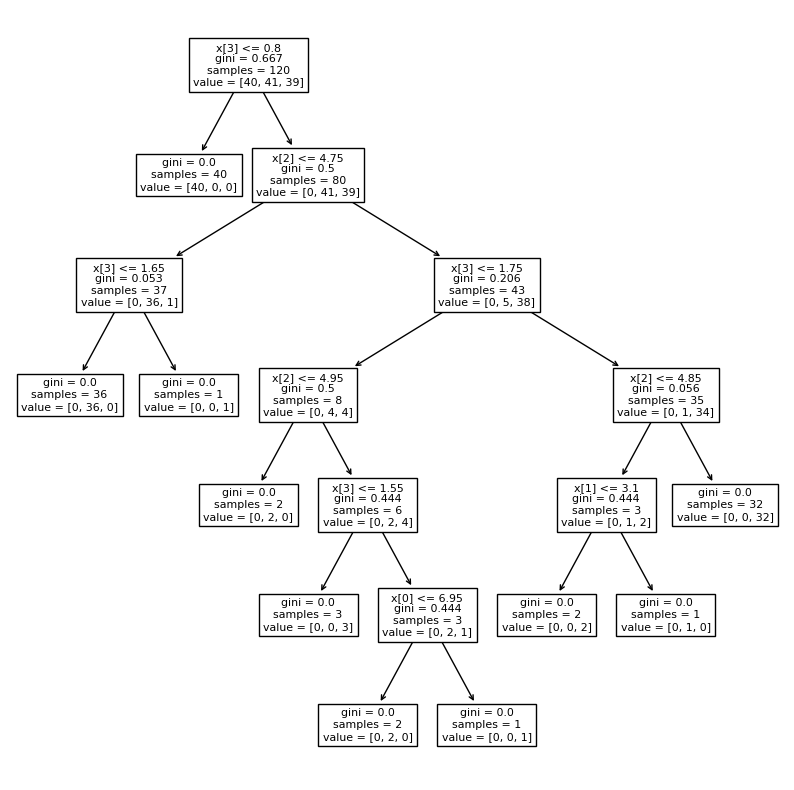

In [ ]:
# 나무 그림 그려보기
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
# 실제로 예측해보기
y_pred = dtc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


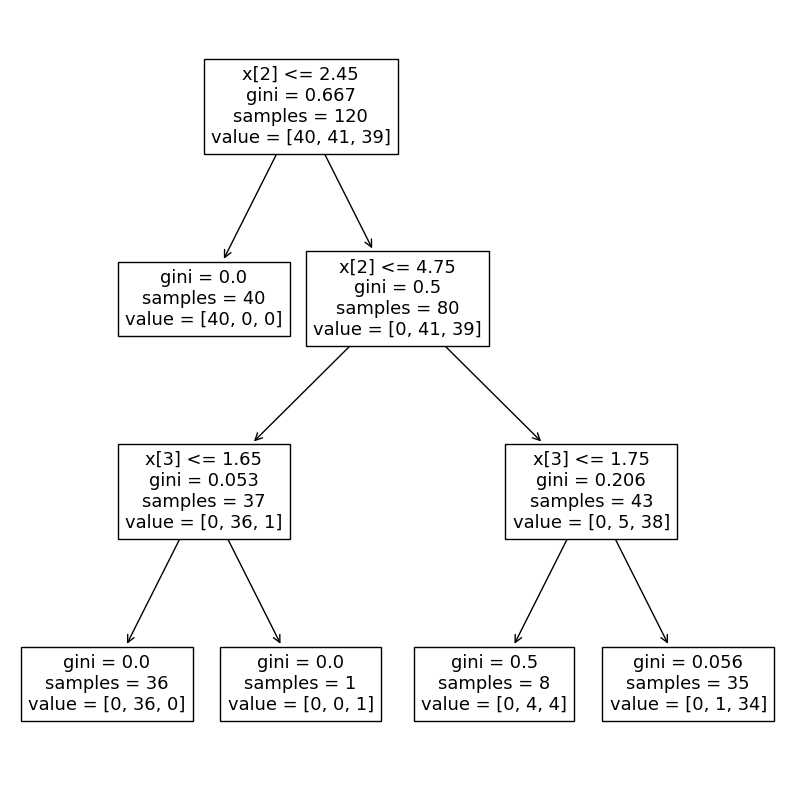

In [ ]:
# 근데 나무가 너무 깊어 tree_depth를 조절해보자
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [ ]:
# 깊이를 수정한 나무로 predict 해보
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


## 어제 했던 팽귄으로 해보장..

In [ ]:
p = pd.read_csv('/content/penguins_size.csv')
pg = pd.DataFrame(p)
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# 무슨 종이 있는지
target = pd.get_dummies(pg['species'])
target[:1]

,Adelie,Chinstrap,Gentoo
0,1,0,0


In [ ]:
pg.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# target 수정하기
pg['species'] = pg['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2])

In [ ]:
# null 다 없애버리기
pg.dropna(inplace = True)

In [ ]:
# check
pg.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# 섬이랑, 성별 제외

X_data = pg.drop(['species', 'island', 'sex'], axis = 1)
y_data = pg['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.3, random_state = 3)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data, y_data,test_size = 0.1, random_state = 3)

### test_size = 0.3

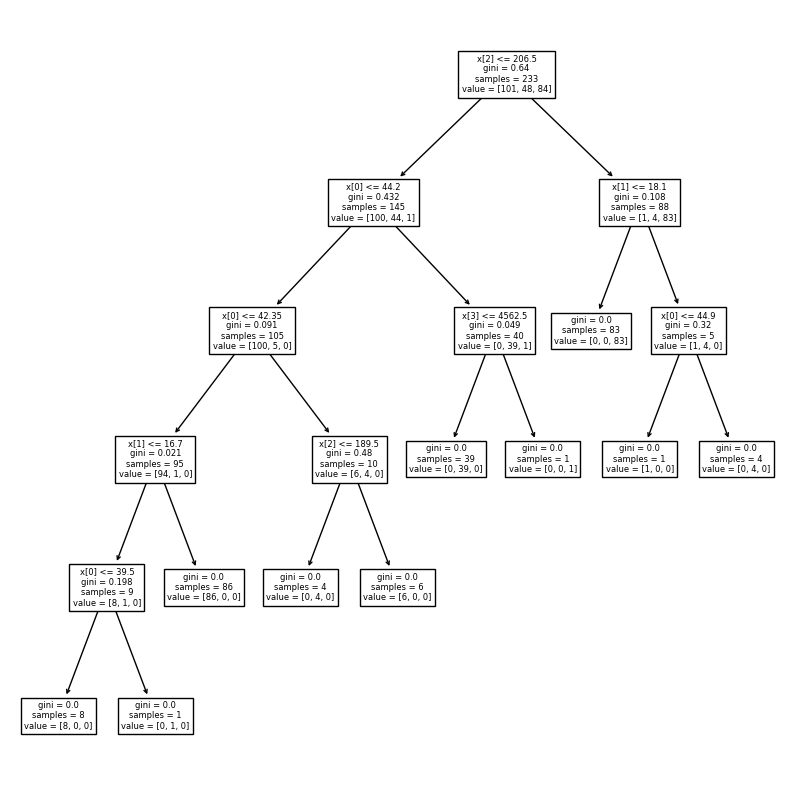

In [ ]:
# 팽귄 트리 - 스케일러 안씀
p_tree = DecisionTreeClassifier()
p_tree.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(p_tree)
plt.show()

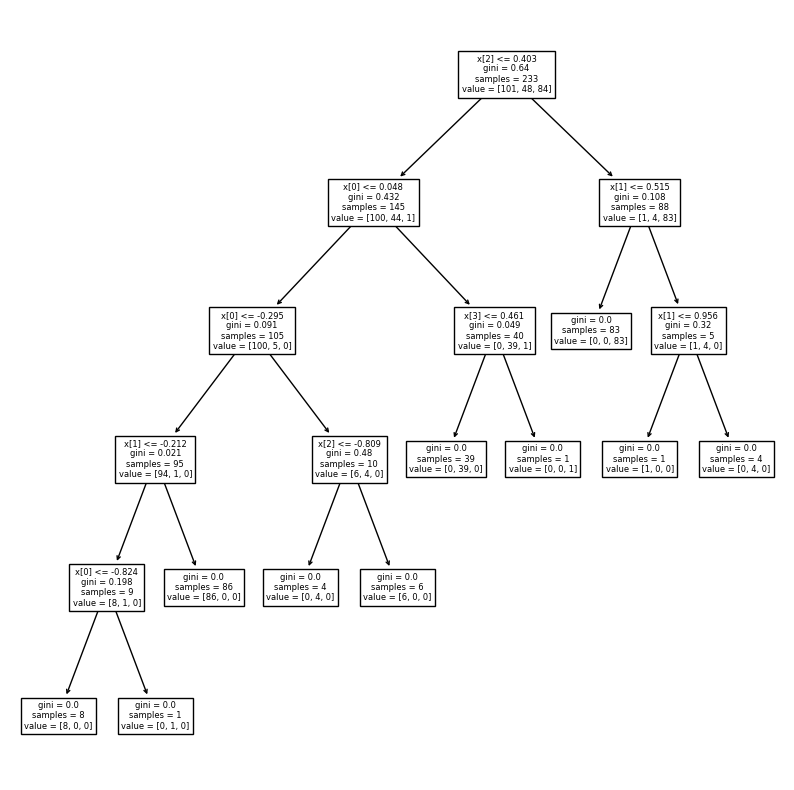

In [ ]:
# 스케일러 해보기
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

p_tree2 = DecisionTreeClassifier()
p_tree2.fit(X_train_scaled, y_train)

plt.figure(figsize=(10,10))
plot_tree(p_tree2)
plt.show()

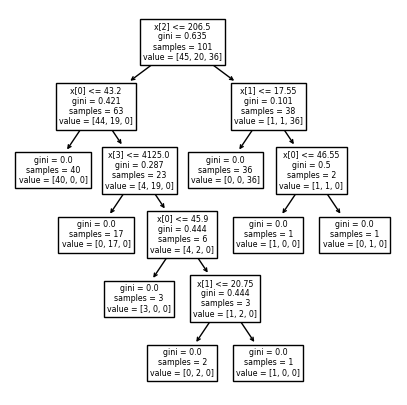

In [ ]:
# test dataset으로도 그려보기
p_tree_testdata = DecisionTreeClassifier()
p_tree_testdata.fit(X_test, y_test)

plt.figure(figsize=(5,5))
plot_tree(p_tree_testdata)
plt.show()

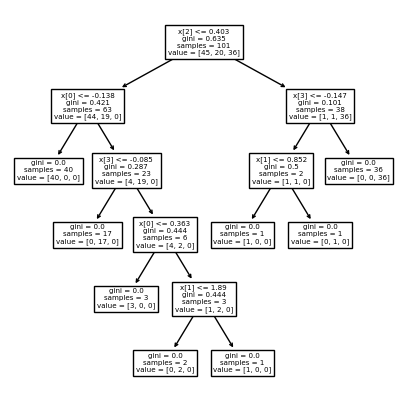

In [ ]:
# scaling
p_tree_testdata2 = DecisionTreeClassifier()
p_tree_testdata2.fit(X_test_scaled, y_test)

plt.figure(figsize=(5,5))
plot_tree(p_tree_testdata2)
plt.show()

### test_size = 0.1

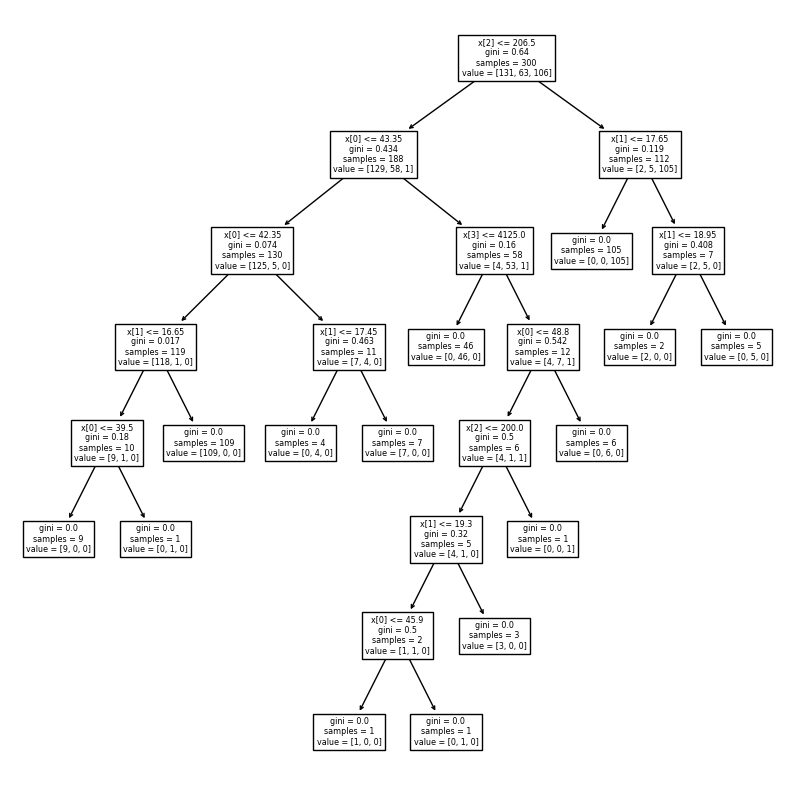

In [ ]:
p_tree3 = DecisionTreeClassifier()
p_tree3.fit(X_train2, y_train2)

plt.figure(figsize=(10,10))
plot_tree(p_tree3)
plt.show()

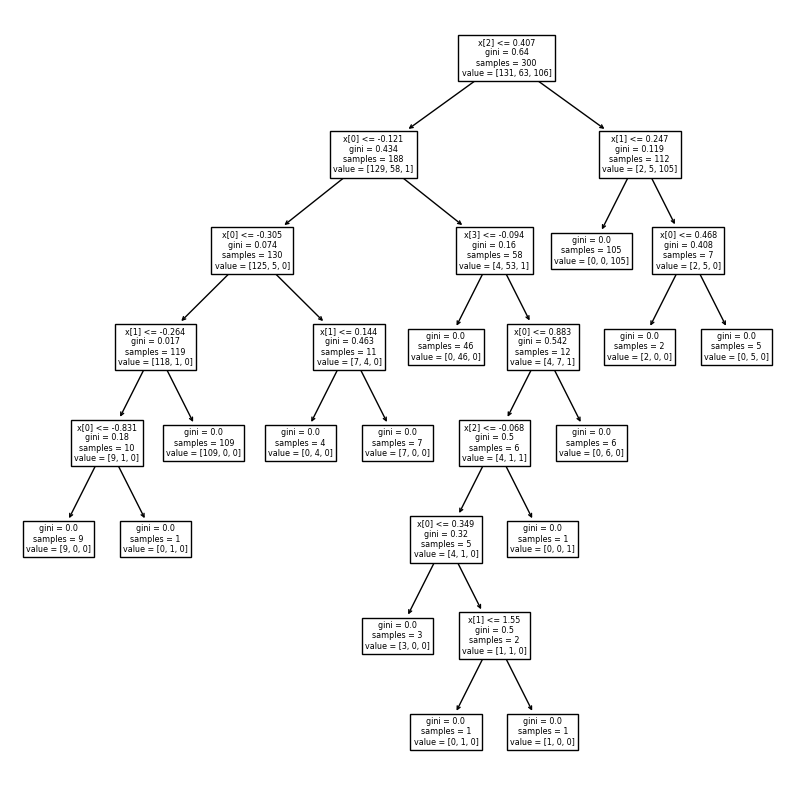

In [ ]:
std = StandardScaler()
std.fit(X_train2)
X_train_scaled2 = std.transform(X_train2)
X_test_scaled2 = std.transform(X_test2)

p_tree4 = DecisionTreeClassifier()
p_tree4.fit(X_train_scaled2, y_train2)

plt.figure(figsize=(10,10))
plot_tree(p_tree4)
plt.show()

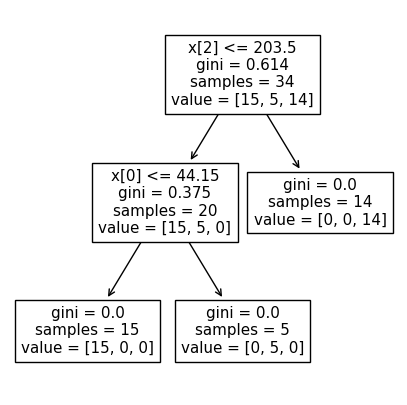

In [ ]:
# test dataset으로도 그려보기
p_tree_testdata3 = DecisionTreeClassifier()
p_tree_testdata3.fit(X_test2, y_test2)

plt.figure(figsize=(5,5))
plot_tree(p_tree_testdata3)
plt.show()

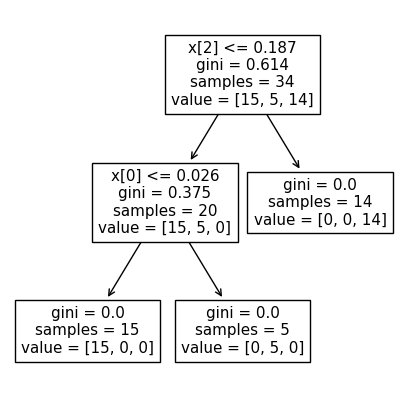

In [ ]:
# scaling
p_tree_testdata4 = DecisionTreeClassifier()
p_tree_testdata4.fit(X_test_scaled2, y_test2)

plt.figure(figsize=(5,5))
plot_tree(p_tree_testdata4)
plt.show()

## 앙상블

In [ ]:
# 모델생성
# 로지스틱 회귀 모델을 만들고 KNN모델을 만들고 두 모델로 보팅 모델
# estimators는 리스트 안에 꼭 튜플 형식으로 집어넣어 줘야 한다. voting 방식은 하드가 아니라 소프트로 지정해준다. 기본값은 하드
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 2개의 분류기를 soft voting
lr_clf = LogisticRegression(solver="liblinear")
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft")

In [ ]:
# 반복하여 정확도를 보면 각각의 알고리즘일 때 보다 보팅 형식으로 묶어 사용했을 때 정확도 상승
# 테스트 사이즈를 줄이고, train 사이즈를 키웠더니 미미하게 성능이 오
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.1, random_state=3)

classifiers = [vo_clf, lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    name = classifier.__class__.__name__
    print(f"{name} 정확도 : {accuracy_score(y_test, pred)}")

VotingClassifier 정확도 : 0.9298245614035088
LogisticRegression 정확도 : 0.9298245614035088
KNeighborsClassifier 정확도 : 0.9298245614035088


- n_estimators	- 결정트리의 갯수를 지정, Default = 10, 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음
- min_samples_split	- 노드를 분할하기 위한 최소한의 샘플 데이터수, → 과적합을 제어하는데 사용, Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- min_samples_leaf	- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수, min_samples_split과 함께 과적합 제어 용도, 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
- max_features	- 최적의 분할을 위해 고려할 최대 feature 개수, Default = 'auto' (결정트리에서는 default가 none이었음), \
int형으로 지정 →피처 갯수 \
float형으로 지정 →비중\
sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정\
log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
- max_depth	- 트리의 최대 깊이, default = None,\
→ 완벽하게 클래스 값이 결정될 때 까지 분할
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할, 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
- max_leaf_nodes	리프노드의 최대 개수

In [ ]:
# 배깅과 랜덤 포레스트

cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)

# n_estimators: 분류기 개수(결정 트리의 개)
params = {'n_estimators': [200], 'max_depth': [4, 6, 8, 10], 'min_samples_leaf': [8, 12, 18],
          'min_samples_split': [8, 16, 20]}

clf = RandomForestClassifier(n_estimators=100)
grid_clf = GridSearchCV(clf, param_grid=params, cv=2, n_jobs=-1)  # -1 은 cpu를 다 쓴다는 의미
grid_clf.fit(X_train, y_train)

print(f"최적의 파라미터\n{grid_clf.best_params_}")
print(f"최고 예측 정확도: {grid_clf.best_score_}")

최적의 파라미터
{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 예측 정확도: 0.948356807511737


### Housing data 사용

In [ ]:
h = pd.read_csv('/content/Boston_house.csv')
hdf = pd.DataFrame(h)
hdf.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [ ]:
corrmat = hdf.corr()
top_corr_features = list(corrmat.index[abs(corrmat["Target"])>=0.4])
top_corr_features

['RM', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'TAX', 'Target']

In [ ]:
house_df = hdf[top_corr_features]

X_data = house_df.drop(['Target'], axis=1)
y_data = house_df['Target']

In [ ]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=3)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 6) (102, 6)
(404,) (102,)


In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
# 앙상블
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators': [50, 100, 200], 'max_depth': [8, 12, 16], 'min_samples_leaf': [4, 8, 12],
          'min_samples_split': [8, 16, 24]}

reg = RandomForestRegressor(n_estimators=100)
grid_reg = GridSearchCV(reg, param_grid=params, cv=2, n_jobs=-1)  # -1 은 cpu를 다 쓴다는 의미
grid_reg.fit(X_train_s, y_train)

print(f"최적의 파라미터\n{grid_reg.best_params_}")
print(f"최고 정확도: {grid_reg.best_score_}")

최적의 파라미터
{'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 50}
최고 정확도: 0.7782773650246475


In [ ]:
# svr과 decistion tree regressor의 보팅
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# scaling
svr = SVR()
tree = DecisionTreeRegressor()
house_voting = VotingRegressor(estimators=[("SVR", svr), ("DecisionTree", tree)])

regressors = [house_voting, svr, tree]
for regressor in regressors:
    regressor.fit(X_train_s, y_train)
    pred = regressor.predict(X_test_s)
    name = regressor.__class__.__name__
    print(f"{name}'s MSE : {mean_squared_error(y_test, pred)}")

VotingRegressor's MSE : 14.439095245350467
SVR's MSE : 20.05878580148368
DecisionTreeRegressor's MSE : 14.354215686274504


## CNN

In [3]:
# 처음에는 ANN으로 수
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리 - gray scale -> 흑백 영상으로 표준화 시행
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1989 - accuracy: 0.9420
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0803 - accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0536 - accuracy: 0.9836
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0374 - accuracy: 0.9877
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9794
테스트 정확도: 0.9793999791145325


In [5]:
# fashion mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

x_train2, x_test2 = train_images/255.0, test_images/255.0

fashion_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
fashion_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
fashion_model.fit(x_train2, train_labels, epochs=10)

# 6. 정확도 평가
test_loss, test_acc = fashion_model.evaluate(x_test2, test_labels)
print('테스트 정확도:', test_acc)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4764 - accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3600 - accuracy: 0.8680
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3231 - accuracy: 0.8811
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2981 - accuracy: 0.8905
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8946
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2648 - accuracy: 0.9010
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2537 - accuracy: 0.9059
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2417 - accuracy: 0.9096
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2312 - accuracy: 0.9137
Epoch 10/10
313/313

### CIFAR로 ANN 수행해보기

x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


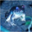

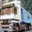

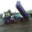

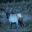

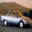

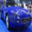

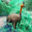

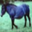

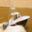

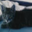

In [6]:
from keras.datasets import cifar10
from google.colab.patches import cv2_imshow

# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))
# 한 번 Training Dataset의 이미지 10개 정도 봅시다
for i in range(10):
  cv2_imshow(x_train[i])

In [7]:
from keras.utils import to_categorical

# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 이번엔 Test Dataset을 Validation Set으로 써봅니다
# One-Hot Encoding (숫자 -> One-Hot Vector)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


In [8]:
cifal_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
cifal_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# 5. 모델 훈련
cifal_model.fit(x_train, y_train, epochs=10)

# 6. 정확도 평가
test_loss, test_acc = cifal_model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8716 - accuracy: 0.3336
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6932 - accuracy: 0.3954
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6232 - accuracy: 0.4214
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5860 - accuracy: 0.4360
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5613 - accuracy: 0.4449
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5404 - accuracy: 0.4547
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5189 - accuracy: 0.4615
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5068 - accuracy: 0.4622
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4966 - accuracy: 0.4676
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.5154 

### 도형 분류 - 개판임.. ANN이라 그런지

In [105]:
import zipfile
import os

# 압축 해제할 파일 경로
zip_path = '/content/shapes.zip'

# 압축 해제될 디렉토리 경로 (변경 가능)
extract_path = '/content/shapes'

# 디렉토리 생성 (없을 경우)
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print('압축 해제 완료')

압축 해제 완료


In [106]:
# 이런거 있는지 몰랐는데 이거 있었으면 입력 데이터 만드느라 개고생하지 않았을 듯
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 생성기 인스턴스화
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/shapes/shapes',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/shapes/shapes',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [114]:
# 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 3)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
# 5. 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 29ms/step - loss: 1.1167 - accuracy: 0.3702 - val_loss: 1.1299 - val_accuracy: 0.3438
Epoch 2/10
7/7 [==============================] - 0s 29ms/step - loss: 1.1336 - accuracy: 0.3221 - val_loss: 1.1261 - val_accuracy: 0.3125
Epoch 3/10
7/7 [==============================] - 0s 28ms/step - loss: 1.1078 - accuracy: 0.3654 - val_loss: 1.0883 - val_accuracy: 0.3750
Epoch 4/10
7/7 [==============================] - 0s 25ms/step - loss: 1.0974 - accuracy: 0.3606 - val_loss: 1.0874 - val_accuracy: 0.3125
Epoch 5/10
7/7 [==============================] - 0s 32ms/step - loss: 1.1045 - accuracy: 0.3173 - val_loss: 1.0963 - val_accuracy: 0.3125
Epoch 6/10
7/7 [==============================] - 0s 32ms/step - loss: 1.1101 - accuracy: 0.3462 - val_loss: 1.0667 - val_accuracy: 0.4062
Epoch 7/10
7/7 [==============================] - 0s 40ms/step - loss: 1.1304 - accuracy: 0.3077 - val_loss: 1.1258 - val_accuracy: 0.3750
Epoch 8/10
7/7 [===========

In [ ]:
model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(2, 2),

    # 두 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten 및 완전 연결 레이어
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
history = model.fit(train_generator, epochs=20, batch_size=16, validation_data=validation_generator)

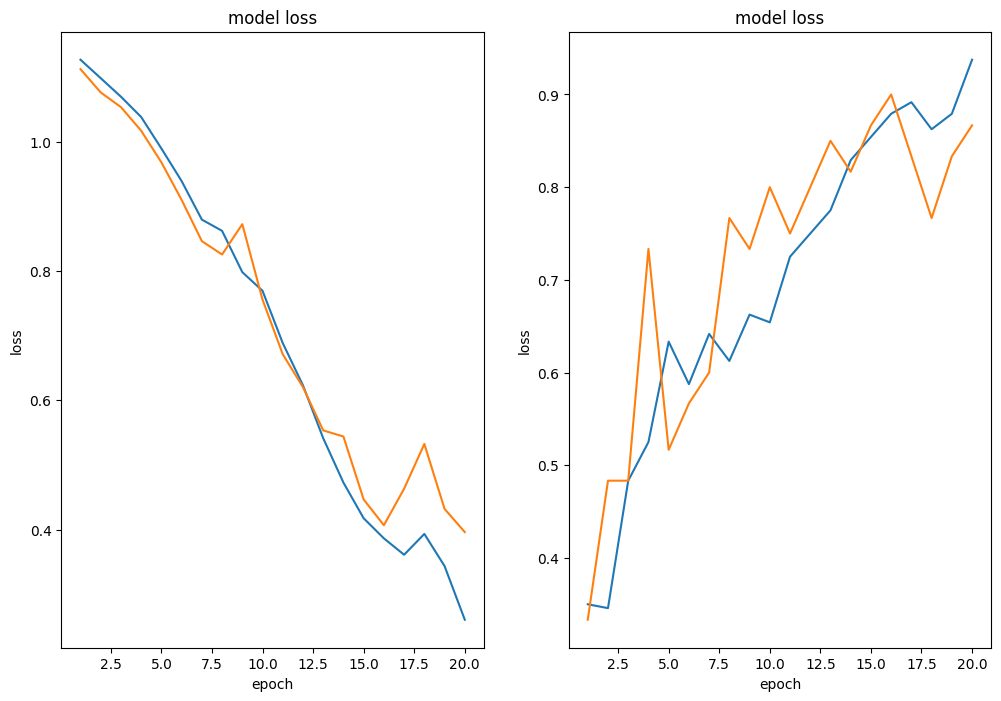

In [130]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


plt.show()

## CIFAR with CNN

데이터는 이전에 ANN에서 정제했다

In [32]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3

# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')

# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(width, height, channel)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_59 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                 

In [33]:
# 모델 학습과정 설정하기
# categorical_crossentropy : 분류가 2개 이상인 CEE
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 16s 9ms/step - loss: 1.7332 - accuracy: 0.3411 - val_loss: 1.4573 - val_accuracy: 0.4551
Epoch 2/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3893 - accuracy: 0.4880 - val_loss: 1.2428 - val_accuracy: 0.5543
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2408 - accuracy: 0.5527 - val_loss: 1.1713 - val_accuracy: 0.5788
Epoch 4/30
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1483 - accuracy: 0.5897 - val_loss: 1.0478 - val_accuracy: 0.6270
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0830 - accuracy: 0.6135 - val_loss: 0.9948 - val_accuracy: 0.6507
Epoch 6/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0304 - accuracy: 0.6372 - val_loss: 1.0160 - val_accuracy: 0.6341
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9825 - accuracy: 0.6527 - val_loss: 0.9200 - val_ac

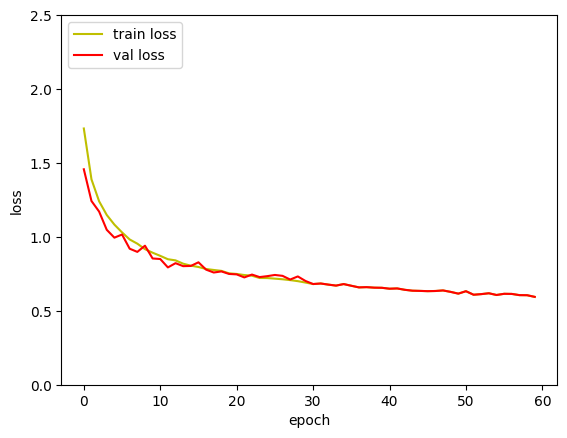

In [38]:
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['loss'] + hist2.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'] + hist2.history['loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.5])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

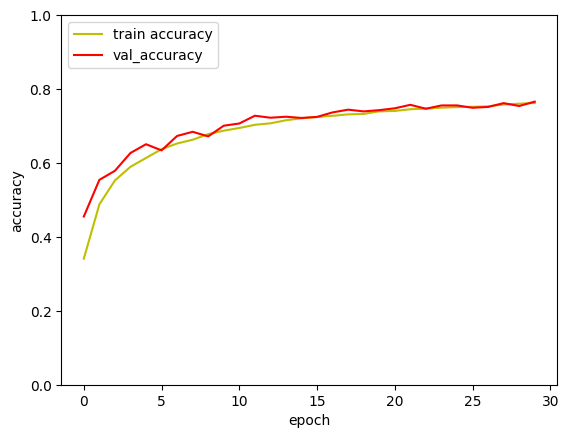

In [35]:
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['accuracy'], 'y', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
# y축 범위 설정
plt.ylim([0.0, 1])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuracy')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

In [36]:
hist2 = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6810 - accuracy: 0.7656 - val_loss: 0.6974 - val_accuracy: 0.7640
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6846 - accuracy: 0.7671 - val_loss: 0.6996 - val_accuracy: 0.7629
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6772 - accuracy: 0.7686 - val_loss: 0.6724 - val_accuracy: 0.7731
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6705 - accuracy: 0.7703 - val_loss: 0.6739 - val_accuracy: 0.7726
Epoch 5/30
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6808 - accuracy: 0.7660 - val_loss: 0.6841 - val_accuracy: 0.7729
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6694 - accuracy: 0.7718 - val_loss: 0.6951 - val_accuracy: 0.7692
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6583 - accuracy: 0.7741 - val_loss: 0.7329 - val_ac

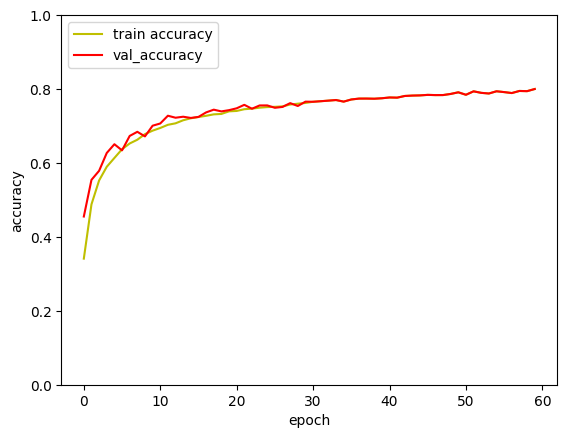

In [37]:
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['accuracy'] + hist2.history['accuracy'], 'y', label='train accuracy')
plt.plot(hist.history['val_accuracy'] + hist2.history['accuracy'], 'r', label='val_accuracy')
# y축 범위 설정
plt.ylim([0.0, 1])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuracy')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()